In [2]:
from fastai import *
from fastai.vision.all import *
from models import SimpleAutoencoder

import sys
sys.path.append('..')
from src.band_plotters import *
from src.Tiff32Image import Tiff32Image

In [3]:
THRESHOLD = 8 

## Load

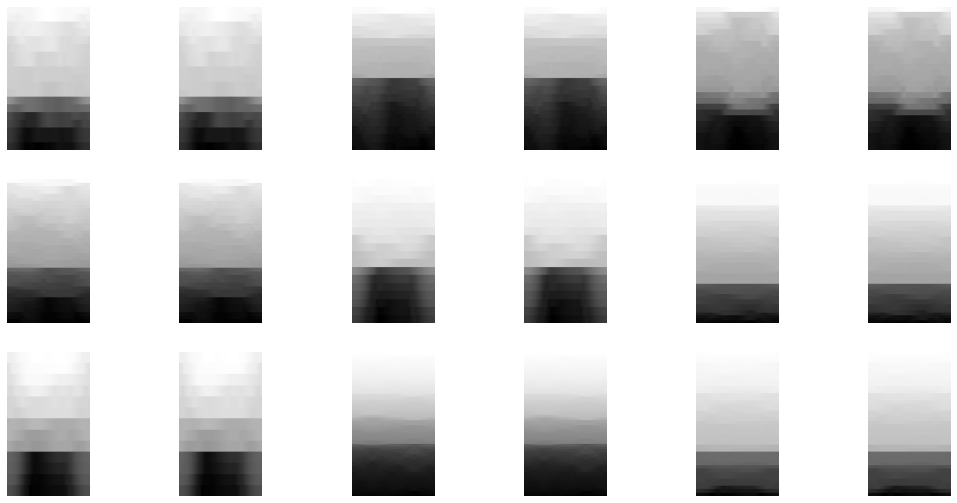

In [4]:
dls = DataBlock(
    blocks=(ImageBlock(cls=Tiff32Image), ImageBlock(cls=Tiff32Image)), 
    get_items=get_image_files,
    n_inp=1,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    batch_tfms=[IntToFloatTensor(div=2**16-1),],
        ).dataloaders(DATA_DIRECTORY/f"images/energies{THRESHOLD}", bs=32)

dls.show_batch()

## Train

### Create Learner

epoch,train_loss,valid_loss,time
0,0.014695,0.015853,00:13
1,0.004358,0.001771,00:07
2,0.001711,0.001342,00:06
3,0.000899,0.000563,00:06
4,0.000674,0.000670,00:06


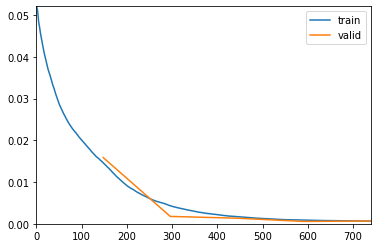

In [5]:
ae = SimpleAutoencoder(n_latent=128)
learn = Learner(dls, ae, F.mse_loss, cbs=[ShowGraphCallback()])
learn.fit_one_cycle(5)

## View Predictions

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

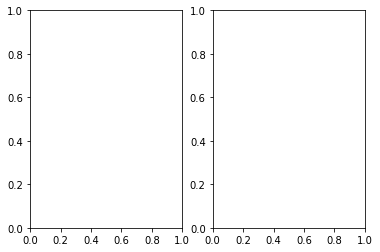

In [3]:
model_path = "trained_models/simple_ae_1.pkl"
trained_model = load_learner(model_path)

view_prediction("2dm-1", trained_model.model)